In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
%cd 'gdrive/MyDrive/SER/implementations/pepino21_interspeech/'

/content/gdrive/MyDrive/SER/implementations/pepino21_interspeech


In [3]:
!pip install opensmile

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 4.5 MB 5.3 MB/s 
     |████████████████████████████████| 48 kB 5.0 MB/s 
     |████████████████████████████████| 635 kB 37.6 MB/s 
     |████████████████████████████████| 167 kB 55.3 MB/s 
     |████████████████████████████████| 596 kB 46.1 MB/s 
  Created wheel for iso-639: filename=iso_639-0.4.5-py3-none-any.whl size=169061 sha256=4cbca23d77ce8c1f896a3e354ecb96e199d4a41654f902e8389462a0d49f6fac
  Stored in directory: /root/.cache/pip/wheels/47/60/19/6d020fc92138ed1b113a18271e83ea4b5525fe770cb45b9a2e
Successfully built iso-639
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
import opensmile
import numpy as np

In [5]:
import torch
import torchaudio
import torchaudio.transforms as T
from torch import nn
from torch.nn.utils.rnn import pad_sequence
import torch.nn.functional as F
from IPython.display import Audio, display

from dataset_classes.ravdess import MergeCalmAndNeutralRAVDESS, MyResample, RavdessAudio
from models.dense.pt_all import PreTrainedAllLayers

In [ ]:
train_dataset = RavdessAudio(dir_path="../../datasets/",
                             csv_path="../../datasets/RAVDESS/my_stuff/train_csv.csv",
                             transform=MyResample(48000, 16000),
                             target_transform=MergeCalmAndNeutralRAVDESS())

In [ ]:
sample, length, samp_rate, spkr_id, label = train_dataset[0]

In [ ]:
feature_xtrctr = opensmile.Smile(
    feature_set=opensmile.FeatureSet.eGeMAPSv02,
    feature_level=opensmile.FeatureLevel.LowLevelDescriptors
)

In [ ]:
feature_xtrctr.feature_names

['Loudness_sma3',
 'alphaRatio_sma3',
 'hammarbergIndex_sma3',
 'slope0-500_sma3',
 'slope500-1500_sma3',
 'spectralFlux_sma3',
 'mfcc1_sma3',
 'mfcc2_sma3',
 'mfcc3_sma3',
 'mfcc4_sma3',
 'F0semitoneFrom27.5Hz_sma3nz',
 'jitterLocal_sma3nz',
 'shimmerLocaldB_sma3nz',
 'HNRdBACF_sma3nz',
 'logRelF0-H1-H2_sma3nz',
 'logRelF0-H1-A3_sma3nz',
 'F1frequency_sma3nz',
 'F1bandwidth_sma3nz',
 'F1amplitudeLogRelF0_sma3nz',
 'F2frequency_sma3nz',
 'F2bandwidth_sma3nz',
 'F2amplitudeLogRelF0_sma3nz',
 'F3frequency_sma3nz',
 'F3bandwidth_sma3nz',
 'F3amplitudeLogRelF0_sma3nz']

In [ ]:
feature_df = feature_xtrctr.process_signal(sample.numpy(), samp_rate)
feature_df.head()

,,Loudness_sma3,alphaRatio_sma3,hammarbergIndex_sma3,slope0-500_sma3,slope500-1500_sma3,spectralFlux_sma3,mfcc1_sma3,mfcc2_sma3,mfcc3_sma3,mfcc4_sma3,...,logRelF0-H1-A3_sma3nz,F1frequency_sma3nz,F1bandwidth_sma3nz,F1amplitudeLogRelF0_sma3nz,F2frequency_sma3nz,F2bandwidth_sma3nz,F2amplitudeLogRelF0_sma3nz,F3frequency_sma3nz,F3bandwidth_sma3nz,F3amplitudeLogRelF0_sma3nz
start,end,,,,,,,,,,,,,,,,,,,,,
0 days 00:00:00,0 days 00:00:00.020000,0.001034,0.0,0.0,0.112,0.076364,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-201.0,0.0,0.0,-201.0,0.0,0.0,-201.0
0 days 00:00:00.010000,0 days 00:00:00.030000,0.001034,0.0,0.0,0.112,0.076364,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-201.0,0.0,0.0,-201.0,0.0,0.0,-201.0
0 days 00:00:00.020000,0 days 00:00:00.040000,0.001034,0.0,0.0,0.112,0.076364,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-201.0,0.0,0.0,-201.0,0.0,0.0,-201.0
0 days 00:00:00.030000,0 days 00:00:00.050000,0.001034,0.0,0.0,0.112,0.076364,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-201.0,0.0,0.0,-201.0,0.0,0.0,-201.0
0 days 00:00:00.040000,0 days 00:00:00.060000,0.001034,0.0,0.0,0.112,0.076364,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-201.0,0.0,0.0,-201.0,0.0,0.0,-201.0


In [ ]:
feature_df['F0semitoneFrom27.5Hz_sma3nz'].to_numpy()

array([ 0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      ,  0.      ,  0.      ,
        0.      ,  0.      ,  0.      ,  0.      , 

In [ ]:
feature_np = feature_df.to_numpy()

In [ ]:
feature_np.shape

(346, 25)

In [ ]:
feature_np.reshape((-1,2,25)).mean(axis=1).shape

(173, 25)

In [ ]:
bundle = torchaudio.pipelines.WAV2VEC2_BASE
model = bundle.get_model()

Downloading: "https://download.pytorch.org/torchaudio/models/wav2vec2_fairseq_base_ls960.pth" to /root/.cache/torch/hub/checkpoints/wav2vec2_fairseq_base_ls960.pth


  0%|          | 0.00/360M [00:00<?, ?B/s]

In [ ]:
output = model(sample.unsqueeze(0))

In [ ]:
output[0].shape

torch.Size([1, 174, 768])

In [6]:
loaded_dict = torch.load("./saved_models/dense/best_pt_all.pt", map_location=torch.device('cpu'))

pt_all_wtd_avg_wts = loaded_dict['model_state_dict']['wtd_avg.weight']
pt_all_wtd_avg_wts = pt_all_wtd_avg_wts.squeeze().numpy()

In [7]:
loaded_dict = torch.load("./saved_models/dense/best_ft_asr_all.pt", map_location=torch.device('cpu'))

ft_asr_all_wtd_avg_wts = loaded_dict['model_state_dict']['wtd_avg.weight']
ft_asr_all_wtd_avg_wts = ft_asr_all_wtd_avg_wts.squeeze().numpy()

In [8]:
import matplotlib.pyplot as plt

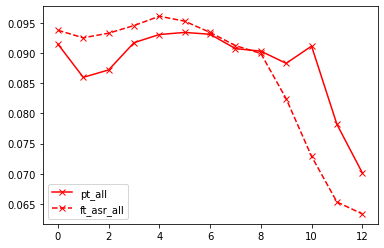

In [10]:
plt.plot(pt_all_wtd_avg_wts/13, 'rx-', label="pt_all")
plt.plot(ft_asr_all_wtd_avg_wts/13, 'rx--', label="ft_asr_all")

plt.legend();